In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew, norm
from warnings import filterwarnings as filt

In [2]:
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')
filt('ignore')

In [3]:
filename = '../datasets/mushrooms.csv'
ddf = pd.read_csv(filename)
ddf.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
ddf.shape

(8124, 23)

In [5]:
ddf.isnull().values.sum()

0

### data cleaning 

In [6]:
attributes = { 

"class": {"edible" : "e", "poisonous" : "p"},

"cap-shape": {"bell" : "b","conical" : "c","convex" : "x","flat" : "f", "knobbed" : "k","sunken" : "s"},

"cap-surface": {"fibrous" : "f","grooves" : "g","scaly" : "y","smooth" : "s"},

"cap-color": {"brown" : "n","buff" : "b","cinnamon" : "c","gray" : "g","green" : "r","pink" : "p","purple" : "u","red" : "e","white" : "w","yellow" : "y"},

"bruises": {"bruises" : "t","no" : "f"},

"odor": {"almond" : "a","anise" : "l","creosote" : "c","fishy" : "y","foul" : "f","musty" : "m","none" : "n","pungent" : "p","spicy" : "s"},

"gill-attachment": {"attached" : "a","descending" : "d","free" : "f","notched" : "n"},

"gill-spacing": {"close" : "c","crowded" : "w","distant" : "d"},

"gill-size": {"broad" : "b","narrow" : "n"},

"gill-color": {"black" : "k","brown" : "n","buff" : "b","chocolate" : "h","gray" : "g", "green" : "r","orange" : "o","pink" : "p","purple" : "u","red" : "e","white" : "w","yellow" : "y"},

"stalk-shape": {"enlarging" : "e","tapering" : "t"},

"stalk-root": {"bulbous" : "b","club" : "c","cup" : "u","equal" : "e","rhizomorphs" : "z","rooted" : "r","missing" : "?"},

"stalk-surface-above-ring": {"fibrous" : "f","scaly" : "y","silky" : "k","smooth" : "s"},

"stalk-surface-below-ring": {"fibrous" : "f","scaly" : "y","silky" : "k","smooth" : "s"},

"stalk-color-above-ring": {"brown" : "n","buff" : "b","cinnamon" : "c","gray" : "g","orange" : "o","pink" : "p","red" : "e","white" : "w","yellow" : "y"},

"stalk-color-below-ring": {"brown" : "n","buff" : "b","cinnamon" : "c","gray" : "g","orange" : "o","pink" : "p","red" : "e","white" : "w","yellow" : "y"},

"veil-type": {"partial" : "p","universal" : "u"},

"veil-color": {"brown" : "n","orange" : "o","white" : "w","yellow" : "y"},

"ring-number": {"none" : "n","one" : "o","two" : "t"},

"ring-type": {"cobwebby" : "c","evanescent" : "e","flaring" : "f","large" : "l","none" : "n","pendant" : "p","sheathing" : "s","zone" : "z"},

"spore-print-color": {"black" : "k","brown" : "n","buff" : "b","chocolate" : "h","green" : "r","orange" : "o","purple" : "u","white" : "w","yellow" : "y"},

"population": {"abundant" : "a","clustered" : "c","numerous" : "n","scattered" : "s","several" : "v","solitary" : "y"},

"habitat": {"grasses" : "g","leaves" : "l","meadows" : "m","paths" : "p","urban" : "u","waste" : "w","woods" : "d"}
}

In [7]:
attributes_rev = { key : {v : k for k,v in values.items()} for key, values in attributes.items()}

In [8]:
df = ddf.copy()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [10]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [11]:
# df['habitat'].replace(attributes_rev['habitat'])

In [12]:
for col in df.columns:
    print(f" {col} ".center(70, '='))
    print()
    print(df[col].replace(attributes_rev[col]).unique())
    print()

=============================== class ================================

['poisonous' 'edible']

============================= cap-shape ==============================

['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']

============================ cap-surface =============================

['smooth' 'scaly' 'fibrous' 'grooves']

============================= cap-color ==============================

['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']

============================== bruises ===============================

['bruises' 'no']

================================ odor ================================

['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']

========================== gill-attachment ===========================

['free' 'attached']

============================ gill-spacing ============================

['close' 'crowded']

============================= gill-size ==============================

['narrow'

dropping veil type since it have only one unique class

In [13]:
df = df.drop(['veil-type'], axis = 1)

In [14]:
for col in ddf.columns:
    ddf[col] = ddf[col].replace(attributes_rev[col])
    
for col in df.columns:
    df[col] = df[col].replace(attributes_rev[col])

In [15]:
ordinal_feats = [col for col in df.columns if df[col].nunique() == 2] + \
            ['ring-number' , 'population' , 'spore-print-color' , 'ring-type', 'veil-color', 
             'stalk-color-below-ring', 'stalk-color-above-ring', 'gill-color', 'cap-color']
unordinal_feats = [col for col in df.columns if col not in ordinal_feats]

In [16]:
unordinal_feats

['cap-shape',
 'cap-surface',
 'odor',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'habitat']

In [17]:
dummies = pd.get_dummies(df[unordinal_feats], prefix_sep = '-', drop_first = True)
dropped_cols = df[unordinal_feats]
df = df.drop(unordinal_feats, axis = 1)
df = pd.concat([df, dummies], axis = 1)
df.head()

,class,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,...,stalk-surface-above-ring-smooth,stalk-surface-below-ring-scaly,stalk-surface-below-ring-silky,stalk-surface-below-ring-smooth,habitat-leaves,habitat-meadows,habitat-paths,habitat-urban,habitat-waste,habitat-woods
0,poisonous,brown,bruises,free,close,narrow,black,enlarging,white,white,...,1,0,0,1,0,0,0,1,0,0
1,edible,yellow,bruises,free,close,broad,black,enlarging,white,white,...,1,0,0,1,0,0,0,0,0,0
2,edible,white,bruises,free,close,broad,brown,enlarging,white,white,...,1,0,0,1,0,1,0,0,0,0
3,poisonous,white,bruises,free,close,narrow,brown,enlarging,white,white,...,1,0,0,1,0,0,0,1,0,0
4,edible,gray,no,free,crowded,broad,black,tapering,white,white,...,1,0,0,1,0,0,0,0,0,0


In [18]:
ordEnc = OrdinalEncoder()
df[ordinal_feats] = ordEnc.fit_transform(df[ordinal_feats])
df.head()

,class,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,...,stalk-surface-above-ring-smooth,stalk-surface-below-ring-scaly,stalk-surface-below-ring-silky,stalk-surface-below-ring-smooth,habitat-leaves,habitat-meadows,habitat-paths,habitat-urban,habitat-waste,habitat-woods
0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,7.00,7.00,...,1,0,0,1,0,0,0,1,0,0
1,0.00,9.00,0.00,1.00,0.00,0.00,0.00,0.00,7.00,7.00,...,1,0,0,1,0,0,0,0,0,0
2,0.00,8.00,0.00,1.00,0.00,0.00,1.00,0.00,7.00,7.00,...,1,0,0,1,0,1,0,0,0,0
3,1.00,8.00,0.00,1.00,0.00,1.00,1.00,0.00,7.00,7.00,...,1,0,0,1,0,0,0,1,0,0
4,0.00,3.00,1.00,1.00,1.00,0.00,0.00,1.00,7.00,7.00,...,1,0,0,1,0,0,0,0,0,0


<AxesSubplot:xlabel='class', ylabel='count'>

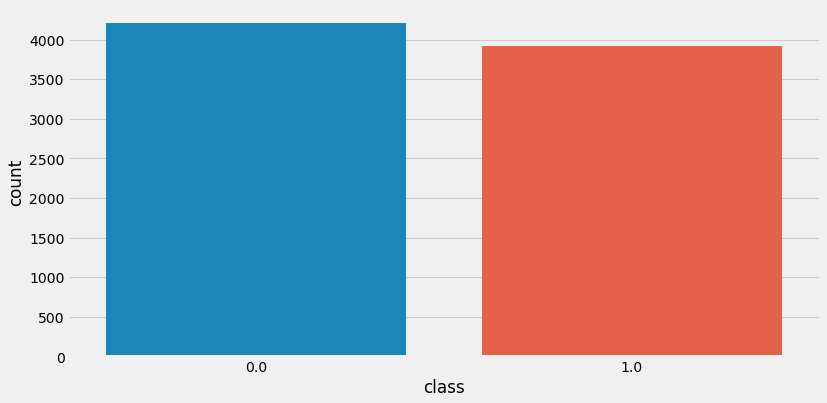

In [20]:
sns.countplot(df['class'])

In [27]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from shap import initjs, force_plot, TreeExplainer

In [53]:
def plot_mi(score):
    score = score.sort_values('mi_score', ascending = True)
    plt.barh(score.index, score.mi_score)
    plt.title('most important features')
    return

def mi_score(x, y):
    score = pd.DataFrame(mutual_info_classif(x, y, discrete_features= False, random_state = 12), index = x.columns, columns = ['mi_score']).sort_values('mi_score', ascending = False)
    plot_mi(score)
    return score

def permImp(x, y):
    model = RandomForestClassifier(random_state = 23).fit(x, y)
    perm = PermutationImportance(model, random_state = 23).fit(x, y)
    return show_weights(perm, feature_names = x.columns.tolist())

def forceplt(x, y, n_cls = 1):
    y = y[y == n_cls].sample(n = 1)
    x_samp = x.loc[y.index, :]
    model = RandomForestClassifier(random_state = 23).fit(x_samp, y)
    explainer = TreeExplainer(model)
    expected_value = explainer.expected_value[n_cls]
    shap_value = explainer.shap_values(x_samp)[n_cls]
    return force_plot(expected_value, shap_value, x_samp)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df.head()

,class,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,...,stalk-surface-above-ring-smooth,stalk-surface-below-ring-scaly,stalk-surface-below-ring-silky,stalk-surface-below-ring-smooth,habitat-leaves,habitat-meadows,habitat-paths,habitat-urban,habitat-waste,habitat-woods
0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,7.00,7.00,...,1,0,0,1,0,0,0,1,0,0
1,0.00,9.00,0.00,1.00,0.00,0.00,0.00,0.00,7.00,7.00,...,1,0,0,1,0,0,0,0,0,0
2,0.00,8.00,0.00,1.00,0.00,0.00,1.00,0.00,7.00,7.00,...,1,0,0,1,0,1,0,0,0,0
3,1.00,8.00,0.00,1.00,0.00,1.00,1.00,0.00,7.00,7.00,...,1,0,0,1,0,0,0,1,0,0
4,0.00,3.00,1.00,1.00,1.00,0.00,0.00,1.00,7.00,7.00,...,1,0,0,1,0,0,0,0,0,0


In [31]:
df.shape

(8124, 47)

In [32]:
x = df.drop(['class'], axis = 1)
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)
x_train.shape, x_test.shape

((6499, 46), (1625, 46))

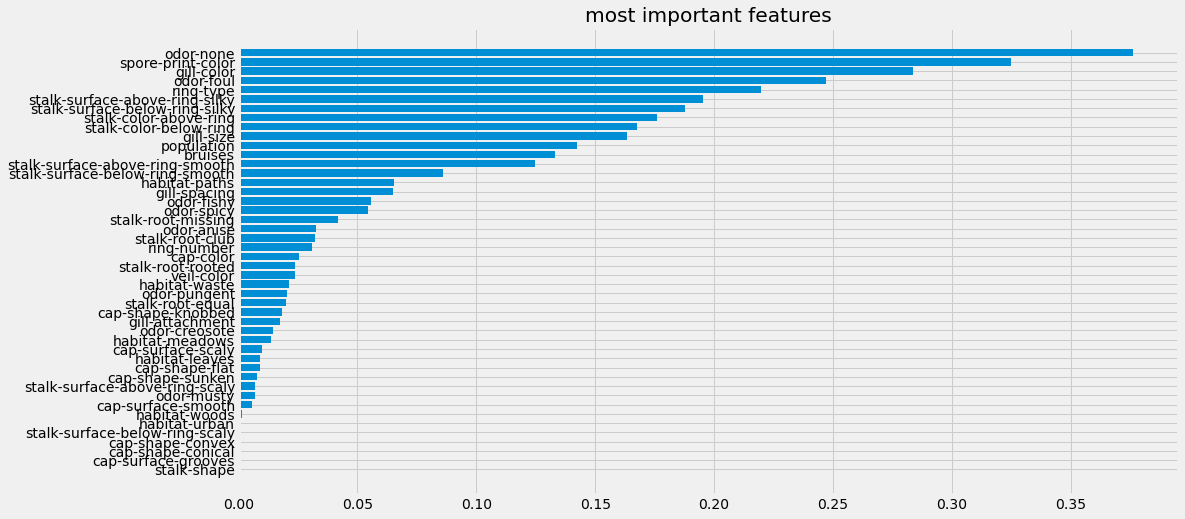

In [54]:
plt.figure(figsize = (15, 8))
mscore = mi_score(x_train, y_train)

In [36]:
mscore[mscore.mi_score == 0]

,mi_score
cap-surface-grooves,0.00
cap-shape-convex,0.00
cap-shape-conical,0.00
stalk-shape,0.00
stalk-surface-below-ring-scaly,0.00


In [40]:
permImp(x_train, y_train)

Weight,Feature
0.0160 ± 0.0014,odor-none
0.0050 ± 0.0005,spore-print-color
0.0006 ± 0.0002,gill-size
0 ± 0.0000,cap-surface-grooves
0 ± 0.0000,cap-shape-sunken
0 ± 0.0000,cap-shape-knobbed
0 ± 0.0000,cap-shape-flat
0 ± 0.0000,cap-shape-convex
0 ± 0.0000,cap-shape-conical
0 ± 0.0000,stalk-color-below-ring


<AxesSubplot:xlabel='odor-none', ylabel='spore-print-color'>

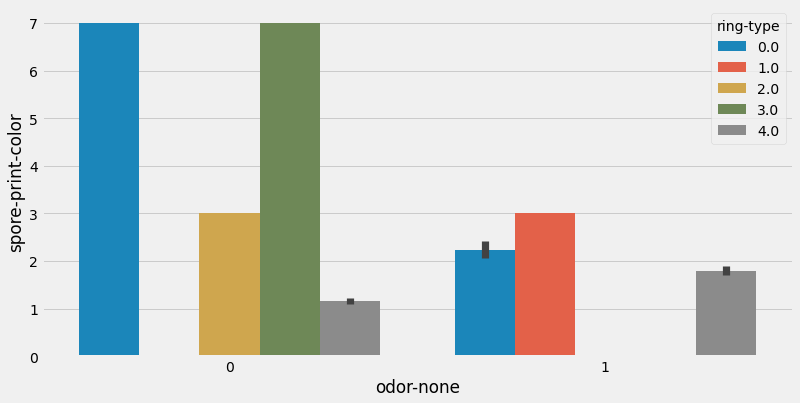

In [60]:
sns.barplot(data = df, x = mscore.index[0], y = mscore.index[1], hue = 'ring-type')

In [69]:
from prettymetrics.clf import LazyClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
def get_score(model, xt, yt, xtest, ytest, pred):
    print(' report '.center(60, '='))
    print()
    print(f'Training score :====> {model.score(xt, yt)}')
    print(f'Testing score :====> {model.score(xtest, ytest)}')
    print()
    print(classification_report(ytest, pred))
    print()
    sns.heatmap(confusion_matrix(ytest, pred), fmt = '.2f', annot = True)
    plt.xlabel('predicted value')
    plt.ylabel('actual value')

In [67]:
clf = LazyClassifier(verbose = 1)
clf.fit(x_train, x_test, y_train, y_test)

  5%|▍         | 2/43 [00:00<00:08,  4.65it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.3527684211730957}
{'Model': 'BaggingClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.11765551567077637}
{'Model': 'BernoulliNB', 'Accuracy': 0.9643076923076923, 'Balanced Accuracy': 0.9630524537150796, 'ROC AUC': 0.9630524537150796, 'F1 Score': 0.964224813161522, 'Time taken': 0.04709124565124512}


 23%|██▎       | 10/43 [00:01<00:02, 13.37it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.38585805892944336}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.034674644470214844}
{'Model': 'DummyClassifier', 'Accuracy': 0.5181538461538462, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.35369723426148236, 'Time taken': 0.024199724197387695}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9993846153846154, 'Balanced Accuracy': 0.9993614303959131, 'ROC AUC': 0.9993614303959131, 'F1 Score': 0.9993846013828228, 'Time taken': 0.03345775604248047}
{'Model': 'ExtraTreesClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.35045504570007324}
{'Model': 'GaussianNB', 'Accuracy': 0.9876923076923076, 'Balanced Accuracy': 0.9872286079182631, 'ROC AUC': 0.9872286079182631, 'F1 Score': 0.987684926022116, 'Time taken': 0.028470277

 30%|███       | 13/43 [00:38<02:10,  4.34s/it]

{'Model': 'GaussianProcessClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 37.19380164146423}


 33%|███▎      | 14/43 [00:39<01:51,  3.84s/it]

{'Model': 'GradientBoostingClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.7890257835388184}
{'Model': 'HistGradientBoostingClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.4737579822540283}


 37%|███▋      | 16/43 [00:40<01:16,  2.85s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.29557061195373535}
{'Model': 'LabelPropagation', 'Accuracy': 0.9993846153846154, 'Balanced Accuracy': 0.9993614303959131, 'ROC AUC': 0.9993614303959131, 'F1 Score': 0.9993846013828228, 'Time taken': 1.3025624752044678}


 42%|████▏     | 18/43 [00:43<01:01,  2.47s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.9993846153846154, 'Balanced Accuracy': 0.9993614303959131, 'ROC AUC': 0.9993614303959131, 'F1 Score': 0.9993846013828228, 'Time taken': 1.7427253723144531}


 47%|████▋     | 20/43 [00:43<00:39,  1.71s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9963076923076923, 'Balanced Accuracy': 0.996437054631829, 'ROC AUC': 0.996437054631829, 'F1 Score': 0.9963081374311755, 'Time taken': 0.29035305976867676}
{'Model': 'LinearSVC', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.13202118873596191}


 49%|████▉     | 21/43 [00:43<00:29,  1.36s/it]

{'Model': 'LogisticRegression', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.12686514854431152}


 51%|█████     | 22/43 [00:45<00:28,  1.34s/it]

{'Model': 'LogisticRegressionCV', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 1.2661457061767578}


 53%|█████▎    | 23/43 [00:46<00:25,  1.30s/it]

{'Model': 'MLPClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 1.1816418170928955}
{'Model': 'NearestCentroid', 'Accuracy': 0.8990769230769231, 'Balanced Accuracy': 0.8962589832030409, 'ROC AUC': 0.896258983203041, 'F1 Score': 0.8982458868931898, 'Time taken': 0.02724623680114746}


 77%|███████▋  | 33/43 [00:49<00:04,  2.37it/s]

{'Model': 'NuSVC', 'Accuracy': 0.9852307692307692, 'Balanced Accuracy': 0.9846743295019157, 'ROC AUC': 0.9846743295019157, 'F1 Score': 0.9852195986701313, 'Time taken': 2.673151731491089}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.04372239112854004}
{'Model': 'Perceptron', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.03218722343444824}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.9926153846153846, 'Balanced Accuracy': 0.9923371647509578, 'ROC AUC': 0.9923371647509578, 'F1 Score': 0.9926129974054503, 'Time taken': 0.035231828689575195}


 88%|████████▊ | 38/43 [00:49<00:01,  3.65it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.308056116104126}
{'Model': 'RidgeClassifier', 'Accuracy': 0.9963076923076923, 'Balanced Accuracy': 0.996437054631829, 'ROC AUC': 0.996437054631829, 'F1 Score': 0.9963081374311755, 'Time taken': 0.051676034927368164}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9963076923076923, 'Balanced Accuracy': 0.996437054631829, 'ROC AUC': 0.996437054631829, 'F1 Score': 0.9963081374311755, 'Time taken': 0.04238128662109375}
{'Model': 'SGDClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.03413057327270508}


 93%|█████████▎| 40/43 [00:49<00:00,  3.93it/s]

{'Model': 'SVC', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.37587666511535645}
[20:03:02] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 43/43 [00:50<00:00,  1.18s/it]

{'Model': 'XGBClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.42008113861083984}
{'Model': 'LGBMClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 0.19664978981018066}


(                                Accuracy  Balanced Accuracy  ROC AUC  \
 Model                                                                  
 AdaBoostClassifier                  1.00               1.00     1.00   
 KNeighborsClassifier                1.00               1.00     1.00   
 XGBClassifier                       1.00               1.00     1.00   
 SVC                                 1.00               1.00     1.00   
 SGDClassifier                       1.00               1.00     1.00   
 RandomForestClassifier              1.00               1.00     1.00   
 Perceptron                          1.00               1.00     1.00   
 PassiveAggressiveClassifier         1.00               1.00     1.00   
 MLPClassifier                       1.00               1.00     1.00   
 LogisticRegressionCV                1.00               1.00     1.00   
 LogisticRegression                  1.00               1.00     1.00   
 BaggingClassifier                   1.00          

In [68]:
from xgboost import XGBClassifier

========================== report ==========================

Training score :====> 1.0
Testing score :====> 1.0

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       842
         1.0       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625




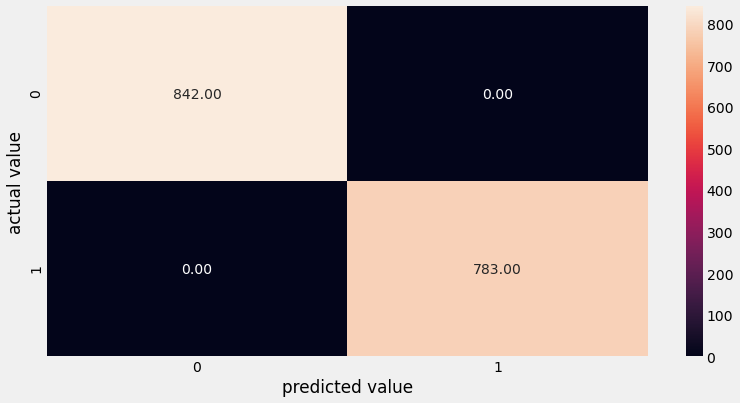

In [74]:
clf = XGBClassifier(verbosity = 0)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
get_score(clf, x_train, y_train, x_test, y_test, pred)